In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 5 notebook

In [4]:
## Load posterior mean dataframe
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))
print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))
print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 5A: Comparative effects on cumulative feeding for different high-dose PYY administration protocols. Horizontal bars indicate switching to the PYY 300 nmol/kg posterior, mimicking the effects of PYY administration

In [5]:
reload(plots)
reload(helpers)

protocol = [(3, 'saline_0.0_A_D_trace.p'), 
            (3, 'LiCl_16.0_R_L_trace.p'),
            (3, 'sib_0.9_A_D_trace.p'),
            (3, 'saline_0.0_A_D_trace.p')]

"""
protocol = [(3, 'saline_0.0_A_D_trace.p'),
            (3, 'sib_0.9_A_D_trace.p'),
            (3, 'saline_0.0_A_D_trace.p'),
            (3, 'sib_0.9_A_D_trace.p')]
"""
fig, axes = plots.dosing_protocol(group_dict, 
                                  protocol, 
                                  num_samples=100)

plt.show()

ValueError: too many values to unpack

## Figure 5B: Optimal dosing protocol for a combination of PYY, leptin, and sibutramine to minimise feeding. Coloured horizontal bars indicate posterior switches as in 5A.

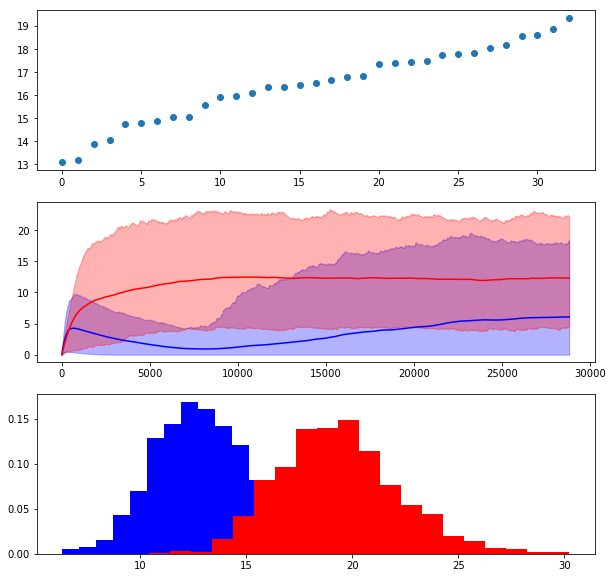

In [14]:
reload(plots)
reload(helpers)

## NOTE: default drug is the first one in the list
druglist = ['saline_0.0_A_D_trace.p',
            'LiCl_16.0_R_L_trace.p',
            'sib_0.9_A_D_trace.p']

fig, axes, ranked_protocols = plots.optimise_protocols(group_dict, 
                                                       druglist, 
                                                       4, 
                                                       2,
                                                       min_default=2,
                                                       num_samples=1000, 
                                                       cutoff=300,
                                                       pc=5)

plt.show()

## Figure 5C: Inter-group variation in response to a behavioural intervention: artificially terminating meals when stomach fullness reaches 15kcal. Posterior mean values coloured by change in mean food intake under behavioural intervention.

In [ ]:
reload(plots)
reload(helpers)

for key in group_dict.keys():
    print key
    fig, axes = plots.behav_change_effect_group(group_dict,
                                                key,
                                                15,
                                                num_samples=1000,
                                                duration=1*60*60)

    plt.show()

## Figure 5D: Inter-individual variation in response to a behavioural intervention: artificially terminating meals when stomach fullness reaches 15kcal. Posterior mean values coloured by change in mean food intake under behavioural intervention.

In [ ]:
reload(plots)
reload(helpers)

thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']
fig, axes = plots.behav_change_effect_indiv(df, 15, thetas, num_samples=1000)

plt.show()